In [15]:
import nbimporter

from koneksi import *

df = load_data()

koneksi.ipynb:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  "    SELECT \n",
koneksi.ipynb:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  "    SELECT \n",


# Exploarasi Data Iris

<!-- # Explorasi Data -->

## 1. Distribusi Sepal Length

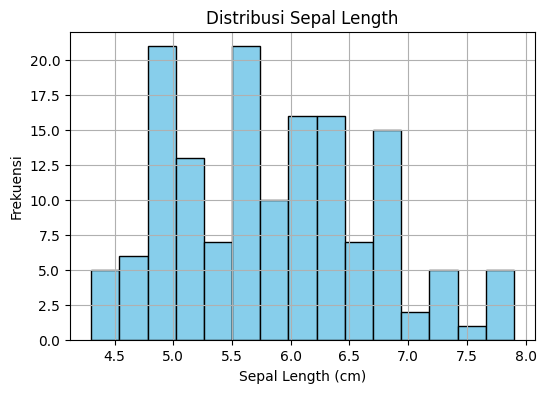

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))
df["sepal_length"].hist(bins=15, color="skyblue", edgecolor="black")
plt.title("Distribusi Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frekuensi")
plt.show()

* Menunjukkan bagaimana panjang sepal pada 150 sampel bunga iris terdistribusi.

* Sebagian besar nilai berkisar antara 5 cm – 6.5 cm, dengan rata-rata sekitar 5.8 cm.

* Distribusi relatif mendekati normal, meski ada sedikit variasi ke sisi kanan (lebih panjang).

## 2. Distribusi Sepal Width

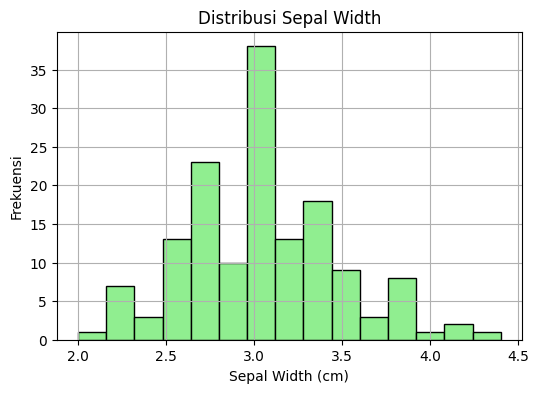

In [5]:
plt.figure(figsize=(6,4))
df["sepal_width"].hist(bins=15, color="lightgreen", edgecolor="black")
plt.title("Distribusi Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frekuensi")
plt.show()


* Nilai paling sering muncul sekitar 3.0 cm, rentang total 2.0 – 4.4 cm.

* Distribusi agak menyebar dengan adanya beberapa sampel yang ekstrem (outlier).

## 3. Distribusi Petal Length

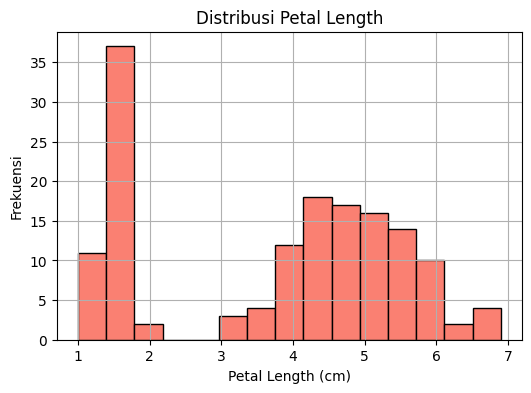

In [6]:
plt.figure(figsize=(6,4))
df["petal_length"].hist(bins=15, color="salmon", edgecolor="black")
plt.title("Distribusi Petal Length")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Frekuensi")
plt.show()


* Sangat jelas terbagi menjadi tiga kelompok sesuai spesies iris.

* Iris-setosa memiliki petal yang sangat pendek (sekitar 1–2 cm).

* Iris-versicolor menengah (4–5 cm).

* Iris-virginica paling panjang (5–7 cm).

* Histogram ini menjadi indikator kuat bahwa petal length dapat memisahkan spesies.

## 4. Distribusi Petal Width

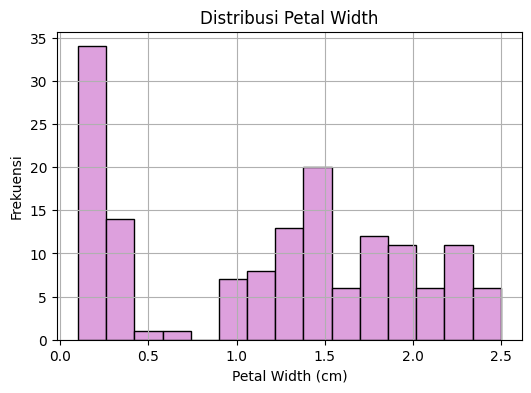

In [7]:
plt.figure(figsize=(6,4))
df["petal_width"].hist(bins=15, color="plum", edgecolor="black")
plt.title("Distribusi Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frekuensi")
plt.show()


* Sama seperti petal length, distribusi terlihat terkelompok.

* Iris-setosa memiliki petal width kecil (~0.2 cm).

* Iris-versicolor sekitar 1.2–1.5 cm.

* Iris-virginica lebih besar (1.8–2.5 cm).

* Sangat efektif untuk klasifikasi antar spesies.

## 5. Boxplot Sepal & Petal Berdasarkan Kelas

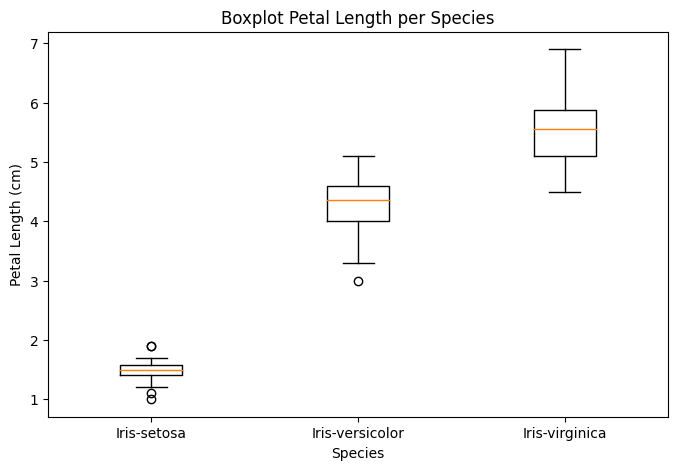

In [8]:
plt.figure(figsize=(8,5))
classes = df["species"].unique()
data = [df[df["species"]==c]["petal_length"] for c in classes]

plt.boxplot(data, labels=classes)
plt.title("Boxplot Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()


* Menunjukkan median, sebaran (IQR), serta outlier untuk tiap kelas iris.

* Iris-setosa memiliki petal length konsisten (median rendah, variasi kecil).

* Iris-versicolor menengah dengan sebaran lebih lebar.

* Iris-virginica median tertinggi dengan variasi lebih luas.

* Boxplot ini memperkuat hasil histogram bahwa petal length adalah fitur yang membedakan antar species.

## 6. Heatmap Korelasi

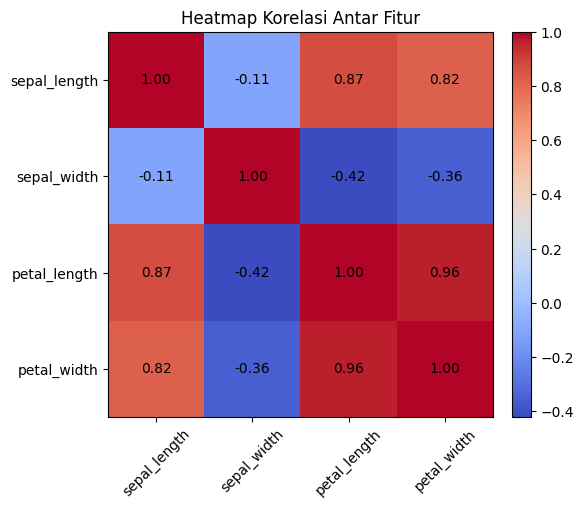

In [9]:
plt.figure(figsize=(6,5))
corr = df.drop(columns=["id"]).corr(numeric_only=True)

im = plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)

# Tampilkan nilai di dalam kotak
for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha="center", va="center", color="black")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

* Petal length & petal width memiliki korelasi sangat tinggi (~0.96).

* Sepal length berkorelasi positif dengan ukuran petal, artinya semakin panjang sepal biasanya petal juga lebih panjang.

* Sepal width tidak begitu berkorelasi dengan fitur lain, sehingga informasi yang diberikannya lebih independen.

* Heatmap membantu mengidentifikasi fitur yang redundant dan fitur yang unik.

# Explorasi Data Bank

In [17]:
import nbimporter

from koneksibank import load_data_bank

df_bank = load_data_bank()

koneksibank.ipynb:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  "        user=\"root\",              # ganti sesuai user MySQL Anda\n",


   age           job  marital  education default_value  balance housing loan  \
0   58    management  married   tertiary            no     2143     yes   no   
1   44    technician   single  secondary            no       29     yes   no   
2   33  entrepreneur  married  secondary            no        2     yes  yes   
3   47   blue-collar  married    unknown            no     1506     yes   no   
4   33       unknown   single    unknown            no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


## Distribusi Kolom Umur

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


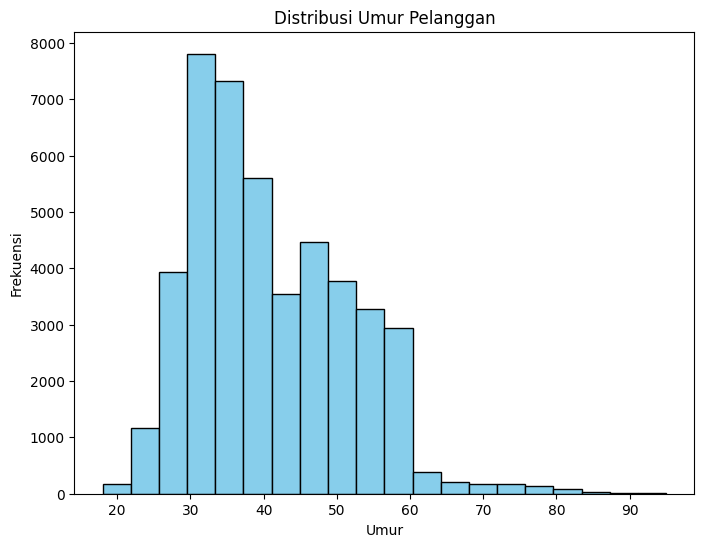

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Deskripsi statistik
print(df_bank['age'].describe())

# Histogram distribusi
plt.figure(figsize=(8, 6))
plt.hist(df_bank['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Umur Pelanggan')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

Berdasarkan distribusi data, umur pelanggan memiliki rata-rata sekitar 41 tahun, dengan standar deviasi 10.6 tahun. Nilai minimum 18 tahun dan maximum 95 tahun. Distribusi cenderung miring ke kiri (left-skewed), di mana sebagian besar pelanggan berusia 30-50 tahun, dengan puncak frekuensi di sekitar 30-40 tahun. Ini menunjukkan bahwa target market bank lebih banyak pada usia dewasa muda hingga menengah, dengan sedikit pelanggan lanjut usia.

## Distribusi Kolom Saldo Rata-rata

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


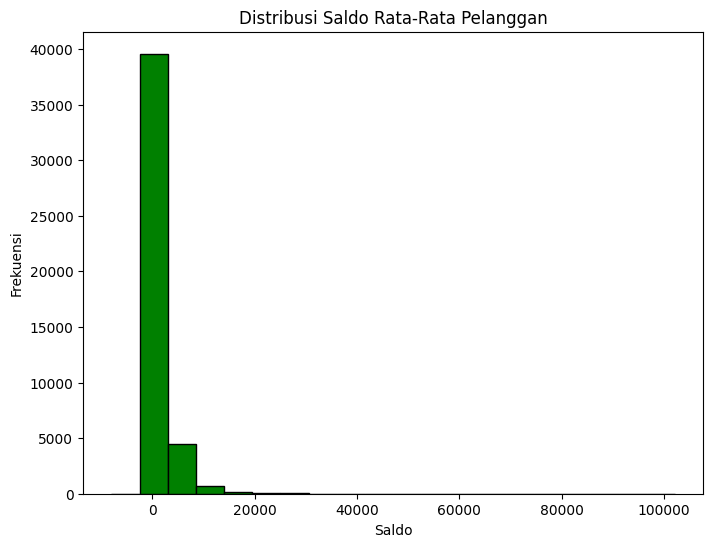

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Deskripsi statistik
print(df_bank['balance'].describe())

# Histogram distribusi
plt.figure(figsize=(8, 6))
plt.hist(df_bank['balance'], bins=20, color='green', edgecolor='black')
plt.title('Distribusi Saldo Rata-Rata Pelanggan')
plt.xlabel('Saldo')
plt.ylabel('Frekuensi')
plt.show()

Saldo rata-rata pelanggan adalah sekitar 1362, dengan standar deviasi tinggi sekitar 3044, menunjukkan variasi besar. Nilai minimum -8019 (saldo negatif) dan maximum 102127. Distribusi sangat miring ke kanan, di mana sebagian besar pelanggan memiliki saldo rendah (dekat 0 atau negatif), dengan sedikit pelanggan memiliki saldo tinggi. Ini mengindikasikan bahwa banyak pelanggan memiliki keuangan terbatas, sementara segelintir memiliki aset signifikan, yang bisa mempengaruhi strategi marketing bank.

## Distribusi Kontak Terakhir

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


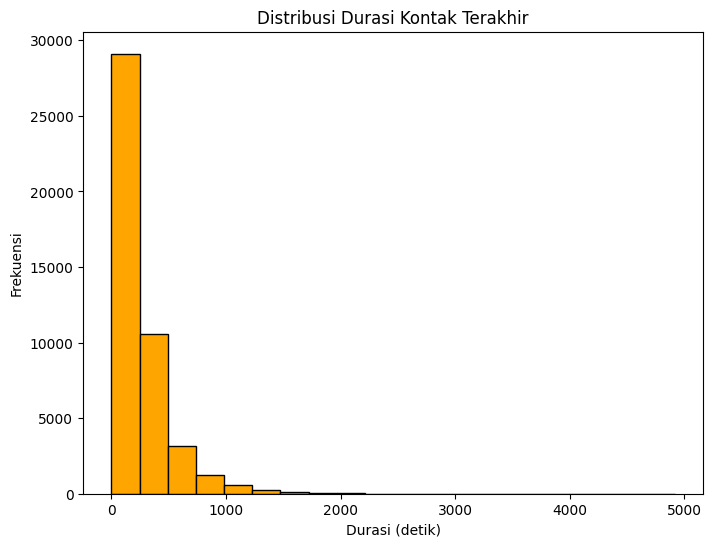

In [20]:
# Deskripsi statistik
print(df_bank['duration'].describe())

# Histogram distribusi
plt.figure(figsize=(8, 6))
plt.hist(df_bank['duration'], bins=20, color='orange', edgecolor='black')
plt.title('Distribusi Durasi Kontak Terakhir')
plt.xlabel('Durasi (detik)')
plt.ylabel('Frekuensi')
plt.show()

Durasi kontak rata-rata adalah sekitar 258 detik (sekitar 4 menit), dengan standar deviasi 259 detik. Nilai minimum 0 detik dan maximum 4918 detik. Distribusi miring ke kanan, dengan sebagian besar kontak pendek (kurang dari 5 menit), dan sedikit yang sangat panjang. Ini menunjukkan bahwa kebanyakan interaksi singkat, tetapi durasi yang lebih lama mungkin berkorelasi dengan kesuksesan kampanye, karena memberikan waktu lebih untuk persuasi.

## Distribusi Kolom Pekerjaan

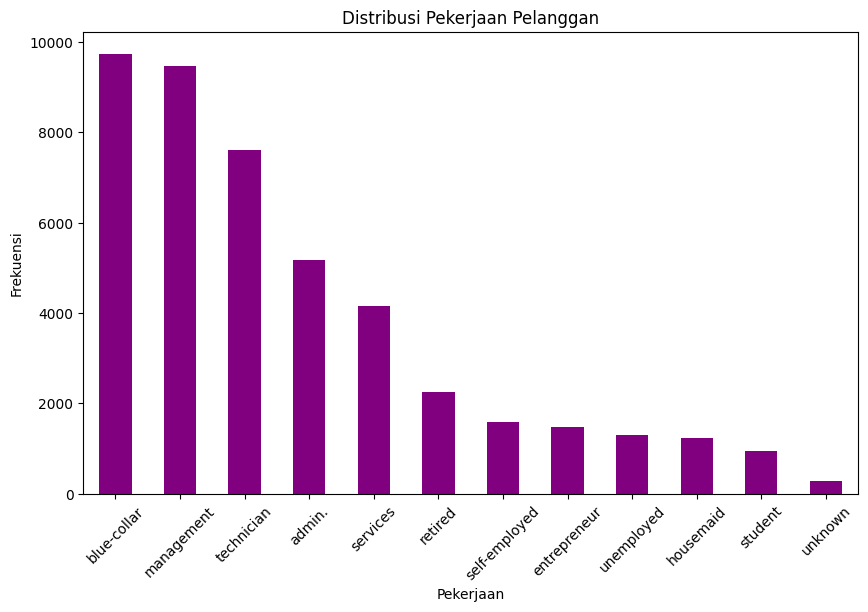

In [21]:

# Hitung frekuensi
job_dist = df_bank['job'].value_counts()

# Bar plot distribusi
plt.figure(figsize=(10, 6))
job_dist.plot(kind='bar', color='purple')
plt.title('Distribusi Pekerjaan Pelanggan')
plt.xlabel('Pekerjaan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

Distribusi pekerjaan menunjukkan bahwa blue-collar (21.5%) adalah yang paling umum, diikuti management (20.9%), technician (16.8%), admin (11.4%), dan services (9.2%). Kategori lain seperti retired, student, dan unknown memiliki proporsi lebih rendah. Ini mengindikasikan bahwa pelanggan bank lebih banyak dari sektor buruh dan manajemen, sehingga strategi marketing bisa difokuskan pada grup ini untuk meningkatkan efektivitas.

## Distribusi Kolom Label (Berlangganan Deposit / Tidak)

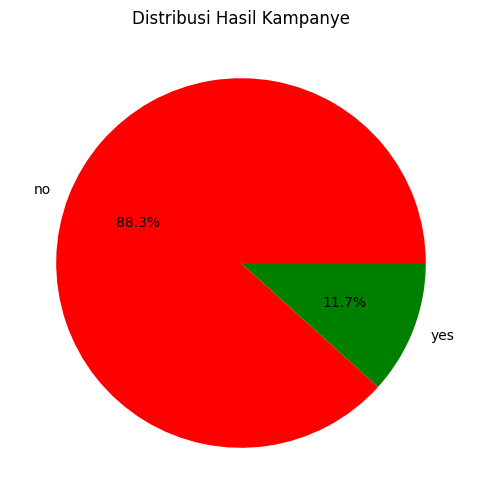

In [22]:

# Hitung frekuensi
y_dist = df_bank['y'].value_counts()

# Pie chart distribusi
plt.figure(figsize=(6, 6))
y_dist.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Distribusi Hasil Kampanye')
plt.ylabel('')
plt.show()

Hasil kampanye menunjukkan bahwa 88.3% pelanggan tidak berlangganan ('no'), sementara 11.7% berlangganan ('yes'). Distribusi ini tidak seimbang (imbalanced), dengan mayoritas negatif. Ini mengimplikasikan bahwa kampanye bank kurang efektif secara keseluruhan, dan analisis lebih lanjut diperlukan untuk mengidentifikasi faktor yang meningkatkan tingkat kesuksesan, seperti durasi kontak atau pekerjaan pelanggan.